In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_train_final = pd.read_csv('../datasets/train.csv')
df_test_final = pd.read_csv('../datasets/test.csv')

In [13]:
df_train_final

,Unnamed: 0,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,...,Time,Winner/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Winner,WinningTeam
0,0,2018090905,2018-09-09,3,8,15,NE,HOU,1,10,...,1:00PM,NE,27,20,389,3,325,2,True,NE
1,1,2018090905,2018-09-09,4,5,58,NE,HOU,3,13,...,1:00PM,NE,27,20,389,3,325,2,True,NE
2,2,2018090905,2018-09-09,4,5,27,NE,HOU,4,2,...,1:00PM,NE,27,20,389,3,325,2,True,NE
3,3,2018090905,2018-09-09,4,5,17,HOU,NE,1,10,...,1:00PM,NE,27,20,389,3,325,2,False,NE
4,4,2018090905,2018-09-09,4,5,13,HOU,NE,2,10,...,1:00PM,NE,27,20,389,3,325,2,False,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39103,39103,2022121801,2022-12-18,1,2,39,PHI,CHI,1,10,...,1:00PM,KC,30,24,502,2,219,1,False,KC
39104,39104,2022121802,2022-12-18,1,1,1,HOU,KC,0,0,...,1:00PM,PHI,25,20,421,3,248,1,False,PHI
39105,39105,2022121802,2022-12-18,1,1,1,HOU,KC,0,0,...,1:00PM,KC,30,24,502,2,219,1,False,KC
39106,39106,2022121801,2022-12-18,4,15,0,PHI,CHI,1,10,...,1:00PM,PHI,25,20,421,3,248,1,True,PHI


In [14]:
df_test_final

,Unnamed: 0,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,...,Time,Winner/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL,Winner,WinningTeam
0,0,2023090700,2023-09-07,3,12,54,KC,DET,0,0,...,8:20PM,DET,21,20,368,1,316,1,False,DET
1,1,2023090700,2023-09-07,1,12,56,KC,DET,3,2,...,8:20PM,DET,21,20,368,1,316,1,False,DET
2,2,2023090700,2023-09-07,1,12,20,KC,DET,1,10,...,8:20PM,DET,21,20,368,1,316,1,False,DET
3,3,2023090700,2023-09-07,1,11,44,KC,DET,2,5,...,8:20PM,DET,21,20,368,1,316,1,False,DET
4,4,2023090700,2023-09-07,1,11,35,KC,DET,3,5,...,8:20PM,DET,21,20,368,1,316,1,False,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,6960,2023121009,2023-12-10,2,1,52,KC,BUF,2,8,...,4:05PM,SF,28,16,527,2,324,2,False,SF
6961,6961,2023121009,2023-12-10,3,7,10,KC,BUF,1,10,...,4:25PM,BUF,20,17,327,1,346,2,False,BUF
6962,6962,2023121009,2023-12-10,3,7,10,KC,BUF,1,10,...,4:05PM,SF,28,16,527,2,324,2,False,SF
6963,6963,2023121009,2023-12-10,4,0,25,BUF,KC,2,11,...,4:25PM,BUF,20,17,327,1,346,2,True,BUF


In [15]:
df_train_final['PenaltyOnWinner'] = df_train_final.apply(lambda row: row['Winner/tie'] == row['PenaltyTeam'], axis = 1)
df_test_final['PenaltyOnWinner'] = df_test_final.apply(lambda row: row['Winner/tie'] == row['PenaltyTeam'], axis = 1)

In [16]:
feature_list = ['Down','ToGo','YardLine','SeriesFirstDown','Yards','IsRush','IsPass','IsIncomplete','IsTouchdown','IsSack','IsChallenge','IsChallengeReversed','IsInterception','IsFumble','IsPenalty','IsTwoPointConversion','IsTwoPointConversionSuccessful','IsPenaltyAccepted','PenaltyOnWinner']
X_train = df_train_final[feature_list]
y_train = df_train_final['Winner']
X_test = df_test_final[feature_list]
y_test = df_test_final['Winner']

In [17]:
X_train = X_train.to_numpy().reshape(-1,len(feature_list))
X_test = X_test.to_numpy().reshape(-1,len(feature_list))

# pca


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [19]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

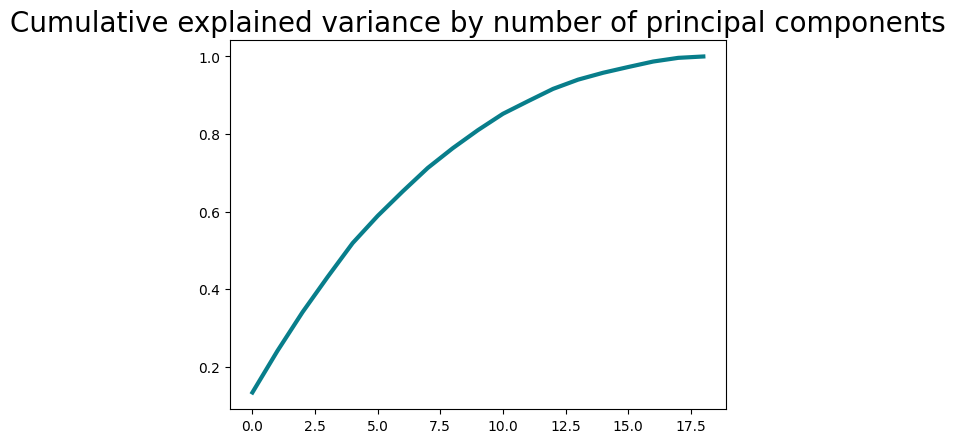

In [26]:
pca1 = PCA(n_components=len(feature_list)).fit(X_train_scaled)

plt.plot(pca1.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [22]:
df_evr = pd.DataFrame(pca1.explained_variance_ratio_, index =['PCA 1','PCA 2','PCA 3'])
ax = df_evr.plot.bar()
ax.set_xlabel('Primary Components')
ax.set_ylim(top=1)
ax.set_title('Unstandardized PC Analysis')
plt.legend('',frameon=False)
plt.show()

NameError: name 'pca1' is not defined

In [21]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

# dtc

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc
# from sklearn.model_selection import train_test_split as tts
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
clf = dtc(criterion='entropy')
clf.fit(X_train,y_train)

In [ ]:
tree.plot_tree(clf, feature_names=[], class_names=['Winner','Loser'])

In [ ]:
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
accuracy